In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [17]:
# from google.colab import files
# df = files.upload()

Saving review_cafe.csv to review_cafe.csv


In [18]:
df = pd.read_csv("review_cafe.csv", sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


1    500
0    500
Name: Liked, dtype: int64

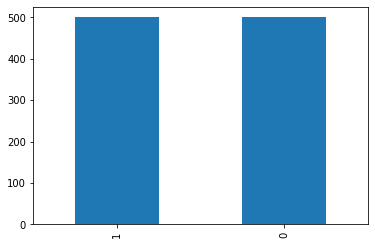

In [7]:
df.Liked.value_counts().plot(kind="bar")
df.Liked.value_counts()

In [8]:
y = df.Liked
x = df.Review

In [9]:
cv = CountVectorizer()
X = cv.fit_transform(x)
cv.get_feature_names()[:5]

['00', '10', '100', '11', '12']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.model_selection import RandomizedSearchCV
parameter_space = {
    'hidden_layer_sizes': [(1024), (50,), (50,100, 50), (48,), (48, 48, 48), (96,), 
                           (144,), (192,), (96, 144, 192), (240,), (144, 192, 240)],
    'activation': ['tanh', 'logistic', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.05, 0.1, 1],
    'beta_1': [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99],
    'beta_2': [0.990, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999],
    'learning_rate': ['constant','adaptive'],
                }

In [12]:
mlp = MLPClassifier(max_iter=10000, random_state=42)

In [13]:
score = ['accuracy', 'precision']
clf = RandomizedSearchCV(mlp, parameter_space, n_jobs = -1, n_iter = 15,  cv=3, 
                         refit='precision', scoring=score, random_state=0)

In [14]:
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Validation Accuracy",score*100,"%")

Validation Accuracy 85.86956521739131 %


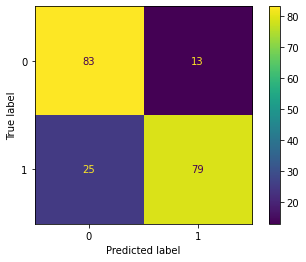

In [15]:
plot_confusion_matrix(clf, x_test, y_test)